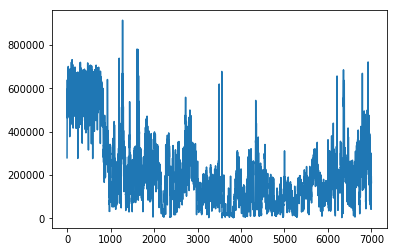

In [37]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('test6in1bus1000.csv', usecols=[1], engine='python')
dataset = dataset[:7000]
plt.plot(dataset)
plt.show()

In [38]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [41]:
train_size = int(len(dataset) * 6/7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [42]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [43]:
model = Sequential()
model.add(LSTM(256, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(128))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=60, batch_size=2, verbose=2)

/home/meilifan/anaconda3/envs/py36/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/60
 - 67s - loss: 0.0047
Epoch 2/60
 - 68s - loss: 0.0041
Epoch 3/60
 - 66s - loss: 0.0038
Epoch 4/60
 - 65s - loss: 0.0038
Epoch 5/60
 - 68s - loss: 0.0036
Epoch 6/60
 - 67s - loss: 0.0036
Epoch 7/60
 - 68s - loss: 0.0036
Epoch 8/60
 - 67s - loss: 0.0035
Epoch 9/60
 - 66s - loss: 0.0034
Epoch 10/60
 - 67s - loss: 0.0035
Epoch 11/60
 - 67s - loss: 0.0034
Epoch 12/60
 - 66s - loss: 0.0034
Epoch 13/60
 - 67s - loss: 0.0034
Epoch 14/60
 - 68s - loss: 0.0034
Epoch 15/60
 - 67s - loss: 0.0034
Epoch 16/60
 - 67s - loss: 0.0034
Epoch 17/60
 - 68s - loss: 0.0033
Epoch 18/60
 - 66s - loss: 0.0034
Epoch 19/60
 - 66s - loss: 0.0033
Epoch 20/60
 - 66s - loss: 0.0033
Epoch 21/60
 - 67s - loss: 0.0033
Epoch 22/60
 - 64s - loss: 0.0033
Epoch 23/60
 - 65s - loss: 0.0033
Epoch 24/60
 - 69s - loss: 0.0033
Epoch 25/60
 - 55s - loss: 0.0032
Epoch 26/60
 - 49s - loss: 0.0033
Epoch 27/60
 - 49s - loss: 0.0033
Epoch 28/60
 - 49s - loss: 0.0032
Epoch 29/60
 - 49s - loss: 0.0032
Epoch 30/60
 - 49s - lo

In [34]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: Found array with dim 3. Estimator expected <= 2.

Train Score: 45513.36 RMSE
Test Score: 247353.51 RMSE


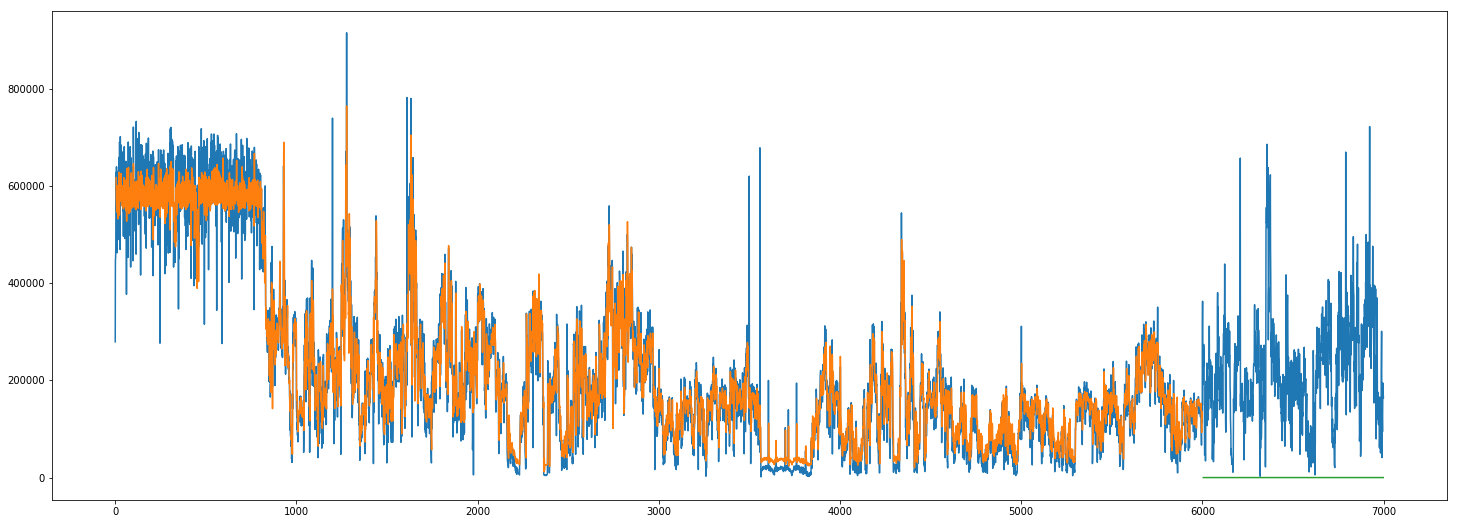

In [36]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(25,9))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
#Average = 196435

In [33]:
67064/196435

0.3414055540000509

In [15]:
6.7/22

0.30454545454545456